In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE

In [13]:
num_clips = 5

In [14]:
data = pd.DataFrame(pd.read_pickle("saved_features/dense_5c_16f_train_no_finetuned_D1_train.pkl")['features'])
annotations = pd.read_pickle("train_val/D1_train.pkl")

data = pd.merge(data, annotations, how="inner", on="uid")


In [15]:
samples = []
for index, row in data.iterrows():
    samples.append({'uid': row.uid, 'name': row.video_name, 'feature': row.features_RGB[random.randint(0, num_clips - 1)], 'label': row.verb})

reduced = TSNE().fit_transform([sample['feature'] for sample in samples])

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


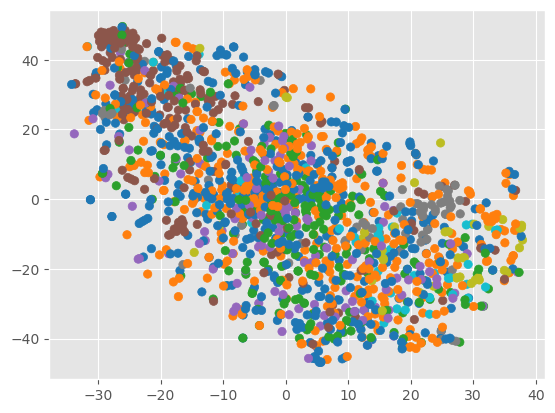

In [16]:
plt.style.use('ggplot')

# plot
x = reduced[:, 0]
y = reduced[:, 1]
classes = [x for x in data['verb_class']]
labels = [x for x in data['verb']]
plt.scatter(x, y, c=classes, label=labels, cmap="tab10")
# plt.legend()
plt.show()